In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
# import tensorflow.keras.layers as layers
# import tensorflow.keras.models as models
# import tensorflow.keras.optimizers as optimizers
import os
import cv2
# from tensorflow.keras import backend as K
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from sklearn.metrics import classification_report

In [8]:
#load dataset 
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print("Shape x_train: ", x_train.shape)
print("Shape y_train: ", y_train.shape)
print("Shape x_test: ", x_test.shape)
print("Shape y_test: ", y_test.shape)

Shape x_train:  (60000, 28, 28)
Shape y_train:  (60000,)
Shape x_test:  (10000, 28, 28)
Shape y_test:  (10000,)


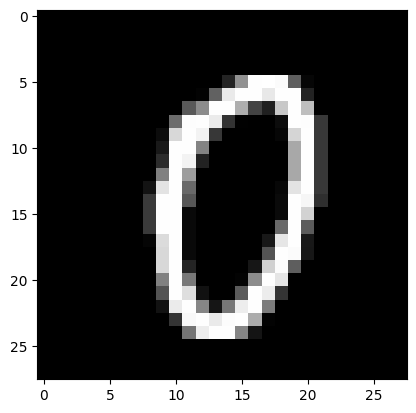

In [9]:

plt.imshow(x_train[1000],cmap='gray')
plt.savefig('data1.png',bbox_inches='tight', pad_inches=0)

In [14]:
#build model
def MyCNN_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(64,(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(375, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(225, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(135, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model 
model =MyCNN_model()
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=256, verbose=2)
# model = Sequential(
#     [Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
#     MaxPooling2D(2,2),
#     Conv2D(64,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dropout(0.5),
#     Dense(10,activation='softmax'),]
# )
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train.reshape(-1,28,28,1), y_train, epochs=10)

Epoch 1/10


c:\NumberWritten\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 - 14s - 58ms/step - accuracy: 0.1116 - loss: 3.3447 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 2/10
235/235 - 11s - 49ms/step - accuracy: 0.1117 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 3/10
235/235 - 11s - 49ms/step - accuracy: 0.1124 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/10
235/235 - 12s - 52ms/step - accuracy: 0.1124 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 5/10
235/235 - 12s - 49ms/step - accuracy: 0.1124 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 6/10
235/235 - 12s - 49ms/step - accuracy: 0.1124 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 7/10
235/235 - 11s - 49ms/step - accuracy: 0.1120 - loss: 2.3019 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 8/10
235/235 - 12s - 52ms/step - accuracy: 0.1124 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 9/10
235/235 - 12s - 51ms/step - accuracy: 0.1124 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2

In [15]:
#Evaluate the model
pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(pred,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.20     10000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.11     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.11      0.20     10000



c:\NumberWritten\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\NumberWritten\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\NumberWritten\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
#Save
model.save("HWRModel.hdf5")

In [18]:
#load
loaded_model = keras.models.load_model("HWRModel.hdf5")

(112, 112)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Image 1 prediction: 1


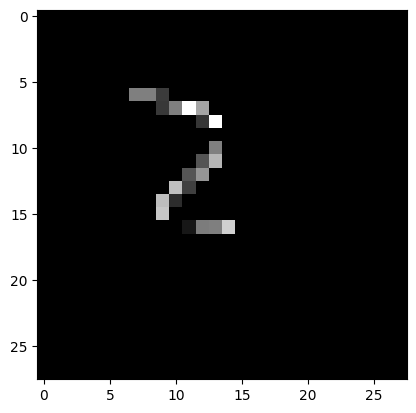

In [19]:
i=1
while os.path.exists(f'img/data{i}.png'):
    img = cv2.imread(f'img/data{i}.png', cv2.IMREAD_GRAYSCALE)
    print(img.shape)
    img = cv2.resize(img, (28, 28))
    img = np.invert(np.array(img))
    img = np.reshape(img, (1, 28, 28, 1))
    pred = loaded_model.predict(img)
    print(f'Image {i} prediction: {np.argmax(pred)}')
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()
    i += 1